In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder # LabelEncoder는 전처리

### 데이터 전처리

In [20]:
# data 불러오기
columns = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", 
           "pedigree", "age", "class"]
df = pd.read_csv("./Dataset/pima-indians-diabetes.csv", names = columns)

In [21]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# 전체 자료 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
# pregnant, class만 DF로 확인
df_1 = df[["pregnant", "class"]]

In [36]:
df_1.groupby(["pregnant"], as_index = False).mean().sort_values(by = "pregnant")

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [37]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


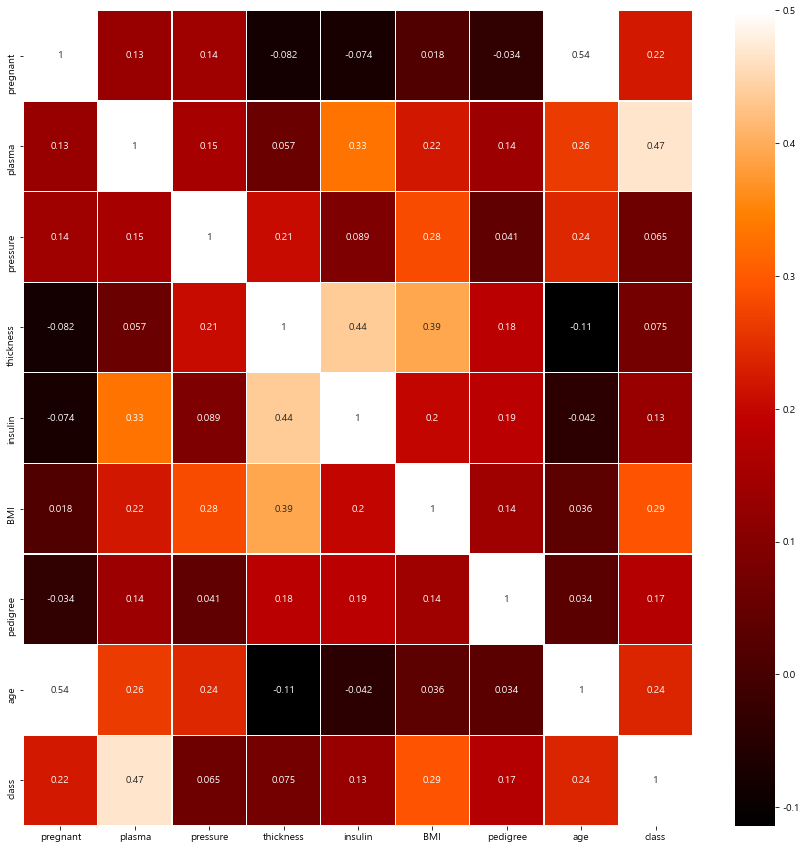

In [39]:
# 상관관계 heatmap 구현
colormap = plt.cm.gist_heat # 그래프 색상 구조
plt.figure(figsize = (15, 15))

# 그래프의 속성
# vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시
sns.heatmap(df.corr(), linewidth = 0.1, vmax = 0.5, cmap = colormap,
           linecolor = "white", annot = True) # annot = 컬러바
plt.show()

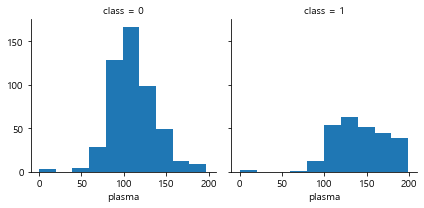

In [45]:
grid = sns.FacetGrid(df, col = "class")
grid.map (plt.hist, "plasma", bins = 10)
plt.show()

### 딥러닝

In [48]:
np.random.seed(0)
tf.random.set_seed(0)

X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [49]:
# 딥러닝 모델 만들기
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

model.fit(X, Y, epochs = 200, batch_size = 10)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1])) # evaluate 손실함수, 정확도

Epoch 1/200
77/77 [==============================] - 0s 845us/step - loss: 7.0523 - accuracy: 0.6211
Epoch 2/200
77/77 [==============================] - 0s 877us/step - loss: 2.0855 - accuracy: 0.6185
Epoch 3/200
77/77 [==============================] - 0s 857us/step - loss: 1.3581 - accuracy: 0.5859
Epoch 4/200
77/77 [==============================] - 0s 867us/step - loss: 1.0376 - accuracy: 0.59240s - loss: 1.0317 - accuracy: 0.59
Epoch 5/200
77/77 [==============================] - 0s 872us/step - loss: 0.8678 - accuracy: 0.6263
Epoch 6/200
77/77 [==============================] - 0s 848us/step - loss: 0.7723 - accuracy: 0.6198
Epoch 7/200
77/77 [==============================] - 0s 835us/step - loss: 0.7391 - accuracy: 0.6237
Epoch 8/200
77/77 [==============================] - 0s 813us/step - loss: 0.7103 - accuracy: 0.6419
Epoch 9/200
77/77 [==============================] - 0s 857us/step - loss: 0.6853 - accuracy: 0.6380
Epoch 10/200
77/77 [==============================] - 0s 

77/77 [==============================] - 0s 836us/step - loss: 0.5455 - accuracy: 0.7253
Epoch 81/200
77/77 [==============================] - 0s 849us/step - loss: 0.5422 - accuracy: 0.7370
Epoch 82/200
77/77 [==============================] - 0s 750us/step - loss: 0.5417 - accuracy: 0.7201
Epoch 83/200
77/77 [==============================] - 0s 799us/step - loss: 0.5431 - accuracy: 0.7370
Epoch 84/200
77/77 [==============================] - 0s 732us/step - loss: 0.5430 - accuracy: 0.7435
Epoch 85/200
77/77 [==============================] - 0s 705us/step - loss: 0.5410 - accuracy: 0.7305
Epoch 86/200
77/77 [==============================] - 0s 771us/step - loss: 0.5382 - accuracy: 0.7370
Epoch 87/200
77/77 [==============================] - 0s 812us/step - loss: 0.5391 - accuracy: 0.7370
Epoch 88/200
77/77 [==============================] - 0s 789us/step - loss: 0.5374 - accuracy: 0.7448
Epoch 89/200
77/77 [==============================] - 0s 787us/step - loss: 0.5363 - accuracy: 

77/77 [==============================] - 0s 835us/step - loss: 0.4967 - accuracy: 0.7643
Epoch 160/200
77/77 [==============================] - 0s 831us/step - loss: 0.5019 - accuracy: 0.7604
Epoch 161/200
77/77 [==============================] - 0s 874us/step - loss: 0.4982 - accuracy: 0.7656
Epoch 162/200
77/77 [==============================] - 0s 800us/step - loss: 0.4978 - accuracy: 0.7552
Epoch 163/200
77/77 [==============================] - 0s 878us/step - loss: 0.4992 - accuracy: 0.7682
Epoch 164/200
77/77 [==============================] - 0s 850us/step - loss: 0.4972 - accuracy: 0.7669
Epoch 165/200
77/77 [==============================] - 0s 856us/step - loss: 0.4966 - accuracy: 0.7708
Epoch 166/200
77/77 [==============================] - 0s 834us/step - loss: 0.5045 - accuracy: 0.7695
Epoch 167/200
77/77 [==============================] - 0s 858us/step - loss: 0.4980 - accuracy: 0.7669
Epoch 168/200
77/77 [==============================] - 0s 822us/step - loss: 0.4986 - a

### iris 품종 예측

In [71]:
# 데이터 불러오기, 컬럼 지정
df = pd.read_csv("./Dataset/iris.csv", 
                 names = ["sepal_length", "sepal_width", 
                          "petal_length", "petal_width", "species"])

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


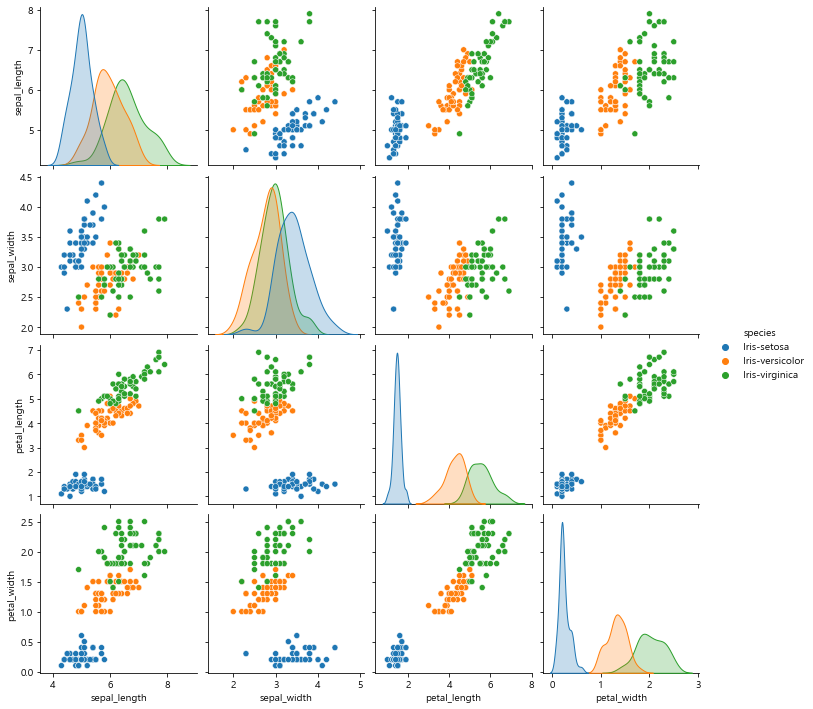

In [60]:
sns.pairplot(df, hue = "species")
plt.show()

In [115]:
# dataframe으로부터 값들만 가져오기
dataset = df.values
X = dataset[:, :-1].astype(float)
Y_obj = dataset[ :, -1]

In [116]:
# 문자열을 숫자로 변환 Label_incoder
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [117]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
# 원-핫 인코딩(카테고리로 분류)
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [119]:
# 모델 만들기
model = Sequential()
model.add(Dense(16, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(3, activation = "softmax"))

In [120]:
# 모델 컴파일
model.compile(loss = "categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [121]:
# 모델 실행
model.fit(X, Y_encoded, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5642 - accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.3838 - accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 1.2240 - accuracy: 0.3400
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1034 - accuracy: 0.4800
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0294 - accuracy: 0.4000
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9681 - accuracy: 0.3333
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9265 - accuracy: 0.3333
Epoch 8/100
5/5 [==============================] - 0s 997us/step - loss: 0.8871 - accuracy: 0.3333
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.8512 - accuracy: 0.3333
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.8210 - accuracy: 0.3667
Epoch 11/100
5/5 [=========

5/5 [==============================] - 0s 997us/step - loss: 0.3475 - accuracy: 0.9667
Epoch 85/100
5/5 [==============================] - 0s 998us/step - loss: 0.3449 - accuracy: 0.9667
Epoch 86/100
5/5 [==============================] - 0s 996us/step - loss: 0.3423 - accuracy: 0.9667
Epoch 87/100
5/5 [==============================] - 0s 997us/step - loss: 0.3396 - accuracy: 0.9667
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.9733
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.9733
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.9733
Epoch 91/100
5/5 [==============================] - 0s 997us/step - loss: 0.3309 - accuracy: 0.9667
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.9667
Epoch 93/100
5/5 [==============================] - 0s 989us/step - loss: 0.3270 - accuracy: 0.9600
Epoch 94/100
5/5 [===

In [122]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

5/5 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.9733

 Accuracy: 0.9733


In [123]:
# 예측값 넣어보기
model.predict(np.array([5.4, 3.9, 1.7, 0.4]).reshape(1, 4))

array([[0.9329325 , 0.06247042, 0.00459719]], dtype=float32)

### 광물 데이터로 딥러닝 - 과적합

In [126]:
df = pd.read_csv("./Dataset/sonar.csv", header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [129]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [134]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [164]:
# object를 숫자로 변경, 원-핫 인코딩을 해서
# 모델을 생성, 실행, 정확도 결과 확인
dataset = df.values

In [165]:
X = dataset[:, :-1].astype(float)
Y_obj = dataset[ :, -1]

In [166]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [150]:
Y_encoded = tf.keras.utils.to_categorical(Y)

In [178]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [195]:
model.compile(loss='BCE', optimizer='adam',
             metrics=['ACC'])

In [196]:
model.fit(X, Y, epochs=200, batch_size = 10)

Epoch 1/200
21/21 [==============================] - 1s 1ms/step - loss: 1.3907e-05 - ACC: 1.0000
Epoch 2/200
21/21 [==============================] - 0s 954us/step - loss: 1.1636e-05 - ACC: 1.0000
Epoch 3/200
21/21 [==============================] - 0s 998us/step - loss: 5.5052e-06 - ACC: 1.0000
Epoch 4/200
21/21 [==============================] - 0s 968us/step - loss: 4.4869e-06 - ACC: 1.0000
Epoch 5/200
21/21 [==============================] - 0s 997us/step - loss: 4.4819e-06 - ACC: 1.0000
Epoch 6/200
21/21 [==============================] - 0s 950us/step - loss: 4.1134e-06 - ACC: 1.0000
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 3.7721e-06 - ACC: 1.0000
Epoch 8/200
21/21 [==============================] - 0s 1ms/step - loss: 3.4369e-06 - ACC: 1.0000
Epoch 9/200
21/21 [==============================] - 0s 1ms/step - loss: 3.6960e-06 - ACC: 1.0000
Epoch 10/200
21/21 [==============================] - 0s 1ms/step - loss: 3.4718e-06 - ACC: 1.0000
Epoch 11/

21/21 [==============================] - 0s 964us/step - loss: 2.8488e-07 - ACC: 1.0000
Epoch 84/200
21/21 [==============================] - 0s 999us/step - loss: 2.8946e-07 - ACC: 1.0000
Epoch 85/200
21/21 [==============================] - 0s 947us/step - loss: 2.7559e-07 - ACC: 1.0000
Epoch 86/200
21/21 [==============================] - 0s 947us/step - loss: 2.6372e-07 - ACC: 1.0000
Epoch 87/200
21/21 [==============================] - 0s 915us/step - loss: 2.7110e-07 - ACC: 1.0000
Epoch 88/200
21/21 [==============================] - 0s 974us/step - loss: 2.5050e-07 - ACC: 1.0000
Epoch 89/200
21/21 [==============================] - 0s 947us/step - loss: 2.4728e-07 - ACC: 1.0000
Epoch 90/200
21/21 [==============================] - 0s 959us/step - loss: 2.5751e-07 - ACC: 1.0000
Epoch 91/200
21/21 [==============================] - 0s 997us/step - loss: 2.4273e-07 - ACC: 1.0000
Epoch 92/200
21/21 [==============================] - 0s 1ms/step - loss: 2.2389e-07 - ACC: 1.0000
Epoch

21/21 [==============================] - 0s 993us/step - loss: 7.2963e-08 - ACC: 1.0000
Epoch 165/200
21/21 [==============================] - 0s 1ms/step - loss: 7.1335e-08 - ACC: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 944us/step - loss: 7.4324e-08 - ACC: 1.0000
Epoch 167/200
21/21 [==============================] - 0s 1ms/step - loss: 6.9085e-08 - ACC: 1.0000
Epoch 168/200
21/21 [==============================] - 0s 926us/step - loss: 7.0313e-08 - ACC: 1.0000
Epoch 169/200
21/21 [==============================] - 0s 932us/step - loss: 6.8539e-08 - ACC: 1.0000
Epoch 170/200
21/21 [==============================] - 0s 913us/step - loss: 6.7133e-08 - ACC: 1.0000
Epoch 171/200
21/21 [==============================] - 0s 913us/step - loss: 6.5671e-08 - ACC: 1.0000
Epoch 172/200
21/21 [==============================] - 0s 898us/step - loss: 6.4556e-08 - ACC: 1.0000
Epoch 173/200
21/21 [==============================] - 0s 958us/step - loss: 6.3547e-08 - ACC: 1.000

In [185]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

7/7 [==============================] - 0s 1ms/step - loss: 9.6608e-06 - accuracy: 1.0000

 Accuracy: 1.0000


### Sonar Test Train

In [197]:
from sklearn.model_selection import train_test_split

In [208]:
# 학습 set과 테스트 set 분리 test_size = 0.3 : percentage
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3,
                                                   random_state = 0)

In [209]:
# 학습 데이터에 모델 생성 및 실행
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [220]:
model.compile(loss = "MSE", optimizer = "adam", metrics=["ACC"])
model.fit(X_train, Y_train, epochs = 120, batch_size = 5)

Epoch 1/120
29/29 [==============================] - 0s 875us/step - loss: 2.2832e-05 - ACC: 1.0000
Epoch 2/120
29/29 [==============================] - 0s 865us/step - loss: 3.2075e-05 - ACC: 1.0000
Epoch 3/120
29/29 [==============================] - 0s 852us/step - loss: 1.1267e-04 - ACC: 1.0000
Epoch 4/120
29/29 [==============================] - 0s 842us/step - loss: 0.0012 - ACC: 1.0000
Epoch 5/120
29/29 [==============================] - 0s 895us/step - loss: 0.0011 - ACC: 1.0000
Epoch 6/120
29/29 [==============================] - 0s 883us/step - loss: 0.0018 - ACC: 1.0000
Epoch 7/120
29/29 [==============================] - 0s 874us/step - loss: 0.0016 - ACC: 1.0000
Epoch 8/120
29/29 [==============================] - 0s 928us/step - loss: 3.8764e-04 - ACC: 1.0000
Epoch 9/120
29/29 [==============================] - 0s 868us/step - loss: 3.8166e-05 - ACC: 1.0000
Epoch 10/120
29/29 [==============================] - 0s 845us/step - loss: 2.4604e-05 - ACC: 1.0000
Epoch 11/120
29

29/29 [==============================] - 0s 867us/step - loss: 5.1473e-06 - ACC: 1.0000
Epoch 82/120
29/29 [==============================] - 0s 865us/step - loss: 5.1300e-06 - ACC: 1.0000
Epoch 83/120
29/29 [==============================] - 0s 782us/step - loss: 5.0964e-06 - ACC: 1.0000
Epoch 84/120
29/29 [==============================] - 0s 855us/step - loss: 5.0627e-06 - ACC: 1.0000
Epoch 85/120
29/29 [==============================] - 0s 819us/step - loss: 5.0540e-06 - ACC: 1.0000
Epoch 86/120
29/29 [==============================] - 0s 855us/step - loss: 5.0327e-06 - ACC: 1.0000
Epoch 87/120
29/29 [==============================] - 0s 927us/step - loss: 5.0770e-06 - ACC: 1.0000
Epoch 88/120
29/29 [==============================] - 0s 819us/step - loss: 4.9393e-06 - ACC: 1.0000
Epoch 89/120
29/29 [==============================] - 0s 748us/step - loss: 4.9293e-06 - ACC: 1.0000
Epoch 90/120
29/29 [==============================] - 0s 733us/step - loss: 4.9162e-06 - ACC: 1.0000
Epo

In [221]:
print("\n Accuracy: %.4f" % (model.evaluate(X_train, Y_train)[1]))

5/5 [==============================] - 0s 1ms/step - loss: 3.9346e-06 - ACC: 1.0000

 Accuracy: 1.0000


In [222]:
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.1325 - ACC: 0.8571

 Accuracy: 0.8571


In [223]:
# model 저장: model.save("저장할 모델명")
model.save("sonar_model.h5")

In [224]:
del model # 메모리 날림

In [226]:
from keras.models import load_model

In [227]:
# 저장된 model 불러오기
model = load_model("./sonar_model.h5")

In [229]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 3ms/step - loss: 0.1325 - ACC: 0.8571


0.8571428656578064

In [231]:
test_data = np.array([0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,
                      0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,
                      0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,
                      0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,
                      0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,
                      0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,
                      0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,
                      0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,
                      0.0180,0.0084,0.0090,0.0032]).reshape(1, 60)

In [233]:
# 예측 해보기
model.predict(test_data)
# 99.7% 확률로 광물이다!

array([[0.9974996]], dtype=float32)

In [235]:
# 모델 정보 확인
model.summary()
# parameter = 60 * 24 + 24(bias) = 1,464
# parameter = 24 * 10 + 10(bias) = 250
# parameter = 10 * 1 + 1(bias) = 11

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 24)                1464      
                                                                 
 dense_56 (Dense)            (None, 10)                250       
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


### 교차 검증 Cross Validation
- 데이터가 충분히 많지 않을 때

In [ ]:
# k겹 교차검증
# k개로 쪼개고 쪼갠 것을 train, test로 나누고 각각을 계산
# 결과를 모두 평균으로 계산

In [302]:
from sklearn.model_selection import StratifiedKFold

def loadCSV(seed, filename, header, target):
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # 초음파 광물 예측 데이터 불러오기
    df = pd.read_csv(filename, header = None)

    # 데이터 셋 분리
    global X
    X = np.array(df.iloc[:, :target])
    Y_obj = np.array(df.iloc[:, target])

    # X와 Y값 처리 -> 전처리(문자 -> 숫자, 분류가 여러개면 원-핫 인코딩)
    e = LabelEncoder()
    e.fit(Y_obj)
    global Y
    Y = e.transform(Y_obj)

In [306]:
def KFold(X, Y, folds = 10, epochs = 100, batch_size = 5):
# 10개의 fold로 쪼개기
    n_fold = folds
    skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

# accuracy 배열에 저장
    accuracy = []

# 모델의 설정, 컴파일, 실행 : n_fold 만큼 반복 
# skf.split(X, Y) default 75% train, 25% test = rain_test_split(X, Y)
# 반복문 안에서 모델 만들기
    for train, test in skf.split(X, Y):
        model = Sequential()
        model.add(Dense(24, input_dim = X.shape[1], activation = "relu"))
        model.add(Dense(10, activation = "relu"))
        model.add(Dense(1, activation = "sigmoid"))
        model.compile(loss = "MSE", optimizer = "adam", metrics = ["ACC"])
        model.fit(X[train], Y[train], epochs = epochs, batch_size = batch_size)
        accuracy.append("%.4f" % model.evaluate(X[test], Y[test])[1])

    print("\nlist: ", accuracy)
    print(np.array(accuracy).astype(float).mean())

In [307]:
loadCSV(0, "./Dataset/pima-indians-diabetes.csv", None, -1)

In [308]:
KFold(X, Y)

Epoch 1/100
139/139 [==============================] - 0s 758us/step - loss: 0.3334 - ACC: 0.6411
Epoch 2/100
139/139 [==============================] - 0s 842us/step - loss: 0.3236 - ACC: 0.6556
Epoch 3/100
139/139 [==============================] - 0s 812us/step - loss: 0.3114 - ACC: 0.6657
Epoch 4/100
139/139 [==============================] - 0s 839us/step - loss: 0.3024 - ACC: 0.6628
Epoch 5/100
139/139 [==============================] - 0s 820us/step - loss: 0.3054 - ACC: 0.6700
Epoch 6/100
139/139 [==============================] - 0s 875us/step - loss: 0.2958 - ACC: 0.6715
Epoch 7/100
139/139 [==============================] - 0s 873us/step - loss: 0.2976 - ACC: 0.6599
Epoch 8/100
139/139 [==============================] - 0s 915us/step - loss: 0.2966 - ACC: 0.6686
Epoch 9/100
139/139 [==============================] - 0s 842us/step - loss: 0.2883 - ACC: 0.6816
Epoch 10/100
139/139 [==============================] - 0s 809us/step - loss: 0.2884 - ACC: 0.6758
Epoch 11/100
139/13

139/139 [==============================] - 0s 942us/step - loss: 0.2320 - ACC: 0.7279
Epoch 84/100
139/139 [==============================] - 0s 783us/step - loss: 0.2203 - ACC: 0.7366
Epoch 85/100
139/139 [==============================] - 0s 779us/step - loss: 0.2235 - ACC: 0.7250
Epoch 86/100
139/139 [==============================] - 0s 815us/step - loss: 0.2068 - ACC: 0.7453
Epoch 87/100
139/139 [==============================] - 0s 799us/step - loss: 0.2020 - ACC: 0.7496
Epoch 88/100
139/139 [==============================] - 0s 833us/step - loss: 0.2243 - ACC: 0.7164
Epoch 89/100
139/139 [==============================] - 0s 858us/step - loss: 0.1958 - ACC: 0.7598
Epoch 90/100
139/139 [==============================] - 0s 855us/step - loss: 0.2047 - ACC: 0.7453
Epoch 91/100
139/139 [==============================] - 0s 800us/step - loss: 0.2057 - ACC: 0.7496
Epoch 92/100
139/139 [==============================] - 0s 801us/step - loss: 0.1963 - ACC: 0.7482
Epoch 93/100
139/139 [=

139/139 [==============================] - 0s 806us/step - loss: 0.1975 - ACC: 0.7207
Epoch 64/100
139/139 [==============================] - 0s 803us/step - loss: 0.1888 - ACC: 0.7410
Epoch 65/100
139/139 [==============================] - 0s 792us/step - loss: 0.1938 - ACC: 0.7135
Epoch 66/100
139/139 [==============================] - 0s 770us/step - loss: 0.1861 - ACC: 0.7366
Epoch 67/100
139/139 [==============================] - 0s 793us/step - loss: 0.1879 - ACC: 0.7511
Epoch 68/100
139/139 [==============================] - 0s 801us/step - loss: 0.1865 - ACC: 0.7337
Epoch 69/100
139/139 [==============================] - 0s 789us/step - loss: 0.1840 - ACC: 0.7410
Epoch 70/100
139/139 [==============================] - 0s 797us/step - loss: 0.1824 - ACC: 0.7294
Epoch 71/100
139/139 [==============================] - 0s 807us/step - loss: 0.1878 - ACC: 0.7207
Epoch 72/100
139/139 [==============================] - 0s 785us/step - loss: 0.1773 - ACC: 0.7410
Epoch 73/100
139/139 [=

139/139 [==============================] - 0s 837us/step - loss: 0.3488 - ACC: 0.6512
Epoch 45/100
139/139 [==============================] - 0s 792us/step - loss: 0.3488 - ACC: 0.6512
Epoch 46/100
139/139 [==============================] - 0s 768us/step - loss: 0.3488 - ACC: 0.6512
Epoch 47/100
139/139 [==============================] - 0s 752us/step - loss: 0.3488 - ACC: 0.6512
Epoch 48/100
139/139 [==============================] - 0s 778us/step - loss: 0.3488 - ACC: 0.6512
Epoch 49/100
139/139 [==============================] - 0s 754us/step - loss: 0.3488 - ACC: 0.6512
Epoch 50/100
139/139 [==============================] - 0s 750us/step - loss: 0.3488 - ACC: 0.6512
Epoch 51/100
139/139 [==============================] - 0s 761us/step - loss: 0.3488 - ACC: 0.6512
Epoch 52/100
139/139 [==============================] - 0s 791us/step - loss: 0.3488 - ACC: 0.6512
Epoch 53/100
139/139 [==============================] - 0s 834us/step - loss: 0.3488 - ACC: 0.6512
Epoch 54/100
139/139 [=

139/139 [==============================] - 0s 832us/step - loss: 0.1945 - ACC: 0.7019
Epoch 26/100
139/139 [==============================] - 0s 851us/step - loss: 0.1946 - ACC: 0.7164
Epoch 27/100
139/139 [==============================] - 0s 828us/step - loss: 0.1907 - ACC: 0.7236
Epoch 28/100
139/139 [==============================] - 0s 841us/step - loss: 0.1915 - ACC: 0.7135
Epoch 29/100
139/139 [==============================] - 0s 806us/step - loss: 0.1976 - ACC: 0.7149
Epoch 30/100
139/139 [==============================] - 0s 832us/step - loss: 0.1920 - ACC: 0.7091
Epoch 31/100
139/139 [==============================] - 0s 840us/step - loss: 0.1919 - ACC: 0.7062
Epoch 32/100
139/139 [==============================] - 0s 769us/step - loss: 0.1893 - ACC: 0.7236
Epoch 33/100
139/139 [==============================] - 0s 819us/step - loss: 0.1869 - ACC: 0.7294
Epoch 34/100
139/139 [==============================] - 0s 829us/step - loss: 0.1874 - ACC: 0.7062
Epoch 35/100
139/139 [=

139/139 [==============================] - 0s 966us/step - loss: 0.2727 - ACC: 0.6816
Epoch 8/100
139/139 [==============================] - 0s 1ms/step - loss: 0.2708 - ACC: 0.6816
Epoch 9/100
139/139 [==============================] - 0s 1ms/step - loss: 0.2641 - ACC: 0.6961
Epoch 10/100
139/139 [==============================] - 0s 1ms/step - loss: 0.2573 - ACC: 0.6787
Epoch 11/100
139/139 [==============================] - 0s 1ms/step - loss: 0.2505 - ACC: 0.6599
Epoch 12/100
139/139 [==============================] - 0s 1ms/step - loss: 0.2349 - ACC: 0.6975
Epoch 13/100
139/139 [==============================] - 0s 1ms/step - loss: 0.2438 - ACC: 0.6816
Epoch 14/100
139/139 [==============================] - 0s 999us/step - loss: 0.2235 - ACC: 0.6961
Epoch 15/100
139/139 [==============================] - 0s 969us/step - loss: 0.2121 - ACC: 0.7091
Epoch 16/100
139/139 [==============================] - 0s 968us/step - loss: 0.2157 - ACC: 0.6932
Epoch 17/100
139/139 [===============

139/139 [==============================] - 0s 993us/step - loss: 0.1641 - ACC: 0.7598
Epoch 91/100
139/139 [==============================] - 0s 935us/step - loss: 0.1546 - ACC: 0.7771
Epoch 92/100
139/139 [==============================] - 0s 971us/step - loss: 0.1585 - ACC: 0.7641
Epoch 93/100
139/139 [==============================] - 0s 986us/step - loss: 0.1600 - ACC: 0.7699
Epoch 94/100
139/139 [==============================] - 0s 999us/step - loss: 0.1528 - ACC: 0.7858
Epoch 95/100
139/139 [==============================] - 0s 967us/step - loss: 0.1613 - ACC: 0.7540
Epoch 96/100
139/139 [==============================] - 0s 986us/step - loss: 0.1582 - ACC: 0.7685
Epoch 97/100
139/139 [==============================] - 0s 977us/step - loss: 0.1656 - ACC: 0.7540
Epoch 98/100
139/139 [==============================] - 0s 992us/step - loss: 0.1594 - ACC: 0.7641
Epoch 99/100
139/139 [==============================] - 0s 1ms/step - loss: 0.1554 - ACC: 0.7670
Epoch 100/100
3/3 [======

139/139 [==============================] - 0s 963us/step - loss: 0.1589 - ACC: 0.7728
Epoch 73/100
139/139 [==============================] - 0s 962us/step - loss: 0.1582 - ACC: 0.7713
Epoch 74/100
139/139 [==============================] - 0s 959us/step - loss: 0.1605 - ACC: 0.7829
Epoch 75/100
139/139 [==============================] - 0s 934us/step - loss: 0.1543 - ACC: 0.7815
Epoch 76/100
139/139 [==============================] - 0s 948us/step - loss: 0.1589 - ACC: 0.7685
Epoch 77/100
139/139 [==============================] - 0s 955us/step - loss: 0.1590 - ACC: 0.7728
Epoch 78/100
139/139 [==============================] - 0s 961us/step - loss: 0.1623 - ACC: 0.7641
Epoch 79/100
139/139 [==============================] - 0s 986us/step - loss: 0.1563 - ACC: 0.7685
Epoch 80/100
139/139 [==============================] - 0s 937us/step - loss: 0.1528 - ACC: 0.7858
Epoch 81/100
139/139 [==============================] - 0s 969us/step - loss: 0.1529 - ACC: 0.7829
Epoch 82/100
139/139 [=

139/139 [==============================] - 0s 956us/step - loss: 0.3488 - ACC: 0.6512
Epoch 55/100
139/139 [==============================] - 0s 948us/step - loss: 0.3488 - ACC: 0.6512
Epoch 56/100
139/139 [==============================] - 0s 918us/step - loss: 0.3488 - ACC: 0.6512
Epoch 57/100
139/139 [==============================] - 0s 945us/step - loss: 0.3488 - ACC: 0.6512
Epoch 58/100
139/139 [==============================] - 0s 907us/step - loss: 0.3488 - ACC: 0.6512
Epoch 59/100
139/139 [==============================] - 0s 940us/step - loss: 0.3488 - ACC: 0.6512
Epoch 60/100
139/139 [==============================] - 0s 950us/step - loss: 0.3488 - ACC: 0.6512
Epoch 61/100
139/139 [==============================] - 0s 919us/step - loss: 0.3488 - ACC: 0.6512
Epoch 62/100
139/139 [==============================] - 0s 958us/step - loss: 0.3488 - ACC: 0.6512
Epoch 63/100
139/139 [==============================] - 0s 916us/step - loss: 0.3488 - ACC: 0.6512
Epoch 64/100
139/139 [=

139/139 [==============================] - 0s 955us/step - loss: 0.3488 - ACC: 0.6512
Epoch 37/100
139/139 [==============================] - 0s 958us/step - loss: 0.3488 - ACC: 0.6512
Epoch 38/100
139/139 [==============================] - 0s 946us/step - loss: 0.3488 - ACC: 0.6512
Epoch 39/100
139/139 [==============================] - 0s 986us/step - loss: 0.3488 - ACC: 0.6512
Epoch 40/100
139/139 [==============================] - 0s 952us/step - loss: 0.3488 - ACC: 0.6512
Epoch 41/100
139/139 [==============================] - 0s 938us/step - loss: 0.3488 - ACC: 0.6512
Epoch 42/100
139/139 [==============================] - 0s 903us/step - loss: 0.3488 - ACC: 0.6512
Epoch 43/100
139/139 [==============================] - 0s 944us/step - loss: 0.3488 - ACC: 0.6512
Epoch 44/100
139/139 [==============================] - 0s 939us/step - loss: 0.3488 - ACC: 0.6512
Epoch 45/100
139/139 [==============================] - 0s 944us/step - loss: 0.3488 - ACC: 0.6512
Epoch 46/100
139/139 [=

139/139 [==============================] - 0s 958us/step - loss: 0.3497 - ACC: 0.6503
Epoch 19/100
139/139 [==============================] - 0s 908us/step - loss: 0.3497 - ACC: 0.6503
Epoch 20/100
139/139 [==============================] - 0s 949us/step - loss: 0.3497 - ACC: 0.6503
Epoch 21/100
139/139 [==============================] - 0s 943us/step - loss: 0.3497 - ACC: 0.6503
Epoch 22/100
139/139 [==============================] - 0s 943us/step - loss: 0.3497 - ACC: 0.6503
Epoch 23/100
139/139 [==============================] - 0s 973us/step - loss: 0.3497 - ACC: 0.6503
Epoch 24/100
139/139 [==============================] - 0s 954us/step - loss: 0.3497 - ACC: 0.6503
Epoch 25/100
139/139 [==============================] - 0s 924us/step - loss: 0.3497 - ACC: 0.6503
Epoch 26/100
139/139 [==============================] - 0s 906us/step - loss: 0.3497 - ACC: 0.6503
Epoch 27/100
139/139 [==============================] - 0s 935us/step - loss: 0.3497 - ACC: 0.6503
Epoch 28/100
139/139 [=

3/3 [==============================] - 0s 2ms/step - loss: 0.3421 - ACC: 0.6579
Epoch 1/100
139/139 [==============================] - 0s 800us/step - loss: 0.3583 - ACC: 0.6171
Epoch 2/100
139/139 [==============================] - 0s 853us/step - loss: 0.3106 - ACC: 0.6676
Epoch 3/100
139/139 [==============================] - 0s 936us/step - loss: 0.3088 - ACC: 0.6763
Epoch 4/100
139/139 [==============================] - 0s 913us/step - loss: 0.3002 - ACC: 0.6734
Epoch 5/100
139/139 [==============================] - 0s 926us/step - loss: 0.3075 - ACC: 0.6618
Epoch 6/100
139/139 [==============================] - 0s 924us/step - loss: 0.2898 - ACC: 0.6864
Epoch 7/100
139/139 [==============================] - 0s 916us/step - loss: 0.2923 - ACC: 0.6850
Epoch 8/100
139/139 [==============================] - 0s 911us/step - loss: 0.2885 - ACC: 0.6749
Epoch 9/100
139/139 [==============================] - 0s 906us/step - loss: 0.2815 - ACC: 0.6922
Epoch 10/100
139/139 [================

139/139 [==============================] - 0s 913us/step - loss: 0.1680 - ACC: 0.7514
Epoch 82/100
139/139 [==============================] - 0s 932us/step - loss: 0.1638 - ACC: 0.7514
Epoch 83/100
139/139 [==============================] - 0s 929us/step - loss: 0.1647 - ACC: 0.7702
Epoch 84/100
139/139 [==============================] - 0s 914us/step - loss: 0.1698 - ACC: 0.7587
Epoch 85/100
139/139 [==============================] - 0s 924us/step - loss: 0.1625 - ACC: 0.7702
Epoch 86/100
139/139 [==============================] - 0s 904us/step - loss: 0.1600 - ACC: 0.7717
Epoch 87/100
139/139 [==============================] - 0s 974us/step - loss: 0.1598 - ACC: 0.7890
Epoch 88/100
139/139 [==============================] - 0s 925us/step - loss: 0.1595 - ACC: 0.7731
Epoch 89/100
139/139 [==============================] - 0s 879us/step - loss: 0.1653 - ACC: 0.7746
Epoch 90/100
139/139 [==============================] - 0s 885us/step - loss: 0.1634 - ACC: 0.7543
Epoch 91/100
139/139 [=

### 베스트 모델 만들기

In [310]:
df_pre = pd.read_csv("./Dataset/wine.csv", header = None)
df_pre.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5773,6.3,0.24,0.22,11.90,0.050,65.0,179.0,0.99659,3.06,0.58,9.3,6,0
5043,6.7,0.30,0.44,18.75,0.057,65.0,224.0,0.99956,3.11,0.53,9.1,5,0
4555,8.1,0.12,0.38,0.90,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6,0
1753,8.2,0.23,0.40,7.50,0.049,12.0,76.0,0.99660,3.06,0.84,9.7,6,0
4799,5.2,0.31,0.36,5.10,0.031,46.0,145.0,0.98970,3.14,0.31,12.4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,6.8,0.24,0.31,18.30,0.046,40.0,142.0,1.00000,3.30,0.41,8.7,5,0
5819,6.0,0.19,0.29,1.20,0.046,29.0,92.0,0.99033,3.22,0.53,11.3,6,0
2814,8.0,0.28,0.42,7.10,0.045,41.0,169.0,0.99590,3.17,0.43,10.6,5,0
4319,7.5,0.26,0.30,4.60,0.027,29.0,92.0,0.99085,3.15,0.38,12.0,7,0


In [331]:
dataset = df_pre.values
X = np.array(dataset[:, :-1])
Y = np.array(dataset[:, -1])

In [332]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [334]:
import os

model_dir = "./model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# {epoch:횟수} - {val_loss:손실값}
modelpath = "./model/{epoch:02d} - {val_loss:.4f}.hdf5"

In [338]:
# model set
model = Sequential()
model.add(Dense(30, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# model compile
model.compile(loss = "BCE", optimizer = "adam", metrics=["ACC"])

# checkpoint
checkpointer = ModelCheckpoint(modelpath, monitor = 'val_loss', # ACC 넣으면 정확도
                               verbose = 1, save_best_only = True) 
                    # verbose:게이지, save_best_only = True: 좋아지면 save

# model run
model.fit(X, Y, epochs = 200, batch_size = 200, 
          validation_split = 0.2, callbacks = [checkpointer], verbose = 0)

# result
# print("\n ACC : %.4f" % (model.evaluate(X, Y)[1]))

# model save 
# model.save("./wine.h5")


Epoch 00001: val_loss improved from inf to 0.03237, saving model to ./model\01 - 0.0324.hdf5

Epoch 00002: val_loss did not improve from 0.03237

Epoch 00003: val_loss did not improve from 0.03237

Epoch 00004: val_loss did not improve from 0.03237

Epoch 00005: val_loss did not improve from 0.03237

Epoch 00006: val_loss did not improve from 0.03237

Epoch 00007: val_loss did not improve from 0.03237

Epoch 00008: val_loss did not improve from 0.03237

Epoch 00009: val_loss did not improve from 0.03237

Epoch 00010: val_loss did not improve from 0.03237

Epoch 00011: val_loss did not improve from 0.03237

Epoch 00012: val_loss did not improve from 0.03237

Epoch 00013: val_loss did not improve from 0.03237

Epoch 00014: val_loss did not improve from 0.03237

Epoch 00015: val_loss did not improve from 0.03237

Epoch 00016: val_loss did not improve from 0.03237

Epoch 00017: val_loss did not improve from 0.03237

Epoch 00018: val_loss did not improve from 0.03237

Epoch 00019: val_loss


Epoch 00154: val_loss did not improve from 0.02247

Epoch 00155: val_loss did not improve from 0.02247

Epoch 00156: val_loss did not improve from 0.02247

Epoch 00157: val_loss did not improve from 0.02247

Epoch 00158: val_loss did not improve from 0.02247

Epoch 00159: val_loss did not improve from 0.02247

Epoch 00160: val_loss did not improve from 0.02247

Epoch 00161: val_loss did not improve from 0.02247

Epoch 00162: val_loss did not improve from 0.02247

Epoch 00163: val_loss did not improve from 0.02247

Epoch 00164: val_loss did not improve from 0.02247

Epoch 00165: val_loss did not improve from 0.02247

Epoch 00166: val_loss did not improve from 0.02247

Epoch 00167: val_loss did not improve from 0.02247

Epoch 00168: val_loss did not improve from 0.02247

Epoch 00169: val_loss did not improve from 0.02247

Epoch 00170: val_loss did not improve from 0.02247

Epoch 00171: val_loss did not improve from 0.02247

Epoch 00172: val_loss did not improve from 0.02247

Epoch 00173